<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 14 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 13 April 2020</div>

# Keras

<br />
<left>
<img src="ipynb.images/keras-hellboy.png" width=250 />
</left>

Minimalist, modular, Open Source Neural Networks API library, written in Python and capable of running on top of either TensorFlow or Theano. Written by [François Chollet](https://fchollet.com/) and adopted by Google's brain team and a number of other frameworks for its simplicity.

- Developed with a focus on going from idea to result with the least possible delay
- Fast prototyping (modularity, minimalism, extensibility)
- Supports both convolutional networks and recurrent networks, as well as combinations
- Supports arbitrary connectivity schemes (including multi-input and multi-output training)
- Runs seamlessly on CPU and GPU
- Initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System)

### References
- http://keras.io/ 
- http://keras.io/documentation/ 
- http://robotfuture.net 
- https://github.com/fchollet/keras 

### Install (already installed if you have tensorflow)
```(python)
pip install keras
```

Keras (κέρας) means [horn](https://en.wikipedia.org/wiki/Horn_(anatomy)) in Greek, and it's a play on the greek words κέρας (horn) / κραίνω (fulfill), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).

<br />
<center>
<img src="ipynb.images/odyssey.jpg" width=400 />
</center>

Reference to a literary image from ancient Greek literature, first found in the [Odyssey](https://en.wikipedia.org/wiki/Odyssey), where dream spirits (Oneiroi, singular [Oneiros](https://en.wikipedia.org/wiki/Oneiros)) are divided between those who deceive with false visions and arrive to Earth through a gate of ivory ([blue pill](https://en.wikipedia.org/wiki/Red_pill_and_blue_pill) in [the Matrix®](https://en.wikipedia.org/wiki/The_Matrix)), and those who announce a future that will come to pass and arrive through a gate of horn ([red pill](https://en.wikipedia.org/wiki/Red_pill_and_blue_pill) in [the Matrix®](https://en.wikipedia.org/wiki/The_Matrix)).

<br />
<center>
<img src="ipynb.images/odyssey3.jpg" width=400 />
</center>

These spirits reappear in [Harry Potter](https://en.wikipedia.org/wiki/Magical_creatures_in_Harry_Potter).

## Homer's Odyssey

<br />
<center>
<img src="ipynb.images/odyssey2.jpg" width=400 />
</center>

>*Oneiroi are beyond our unravelling --who can be sure what tale they tell? Not all that men look for comes to pass. Two gates there are that give passage to fleeting Oneiroi; one is made of horn, one of ivory. The Oneiroi that pass through sawn ivory are deceitful, bearing a message that will not be fulfilled; those that come out through polished horn have truth behind them, to be accomplished for men who see them*. 
- [Homer](https://en.wikipedia.org/wiki/Homer), [Odyssey](https://en.wikipedia.org/wiki/Odyssey) 19 ([Shewring](https://en.wikipedia.org/wiki/English_translations_of_Homer) translation)

The Greek [Odyssey](https://en.wikipedia.org/wiki/Odyssey) (circa 800 BC) is an epic poem alike India's [Bhagavad Gita](https://en.wikipedia.org/wiki/Bhagavad_Gita) or the [Mahabharata](https://en.wikipedia.org/wiki/Mahabharata), a Sanskrit epic narrating the struggle between two groups of cousins, the Kaurava and the Pāṇḍava princes (circa 400 BC), and like China's [Hēi Àn Zhuàn](https://en.wikipedia.org/wiki/Epic_of_Darkness) or 黑暗传, myths relating to the creation of the world from the birth of Pangu, the first living being and the creator of all in some versions of Chinese mythology, written in the [Tang](https://en.wikipedia.org/wiki/Tang_dynasty) Dynasty (600 to 900 AD). 

Keras by [François Chollet](https://www.linkedin.com/in/fchollet) is now the main API of Tensorflow 2.0.

We will use Keras to showcase how neural network build models: Going from ***bunny clouds*** to ***bunny meshes***. For simplicity, we will start with a *single* neuron and 1D data.

# Activation functions recap

Let's start with a recap on activation functions, in 1 and 2D:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

[-5, 5, -0.2, 1.2]

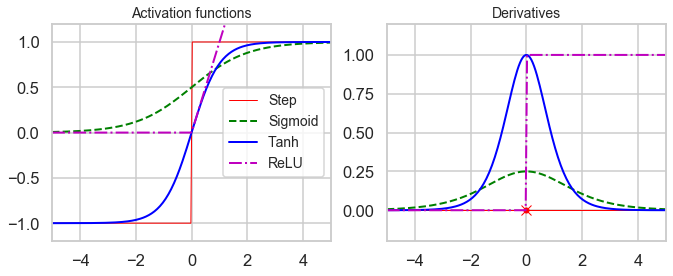

In [4]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

Non-linear activation functions help us build classifiers that are impossible to build with using linear brains like our caterpilar one. This single fact is one of the major factors for the dark ages in AI from the 1960s to the late 1990s.

In [5]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

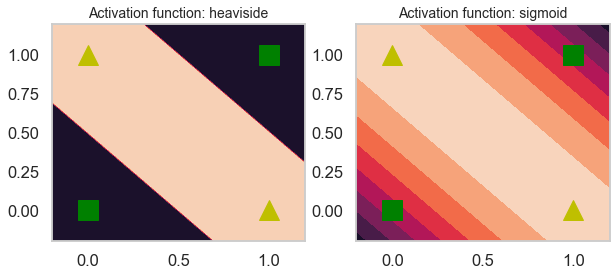

In [6]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# One Neuron

Let's build ourselves a neuron. Let's start with some ridiculously simple data:

Text(0, 0.5, 'b')

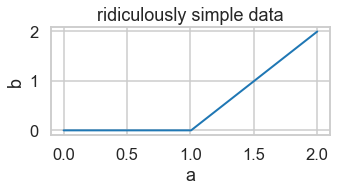

In [7]:
n_points = 200
x = np.linspace(0, 2, n_points)
y = np.array([0] * int(n_points / 2) + list(x[:int(n_points / 2)])) * 2

plt.figure(figsize=(5, 2))
plt.plot(x, y, linewidth=2)
plt.title('ridiculously simple data')
plt.xlabel('a')
plt.ylabel('b')

>**NOTE**: The data we're going to model with in this notebook consists of **point-clouds** (`x = np.linspace(0, 2, n_points)`). It is ***not*** continuous, even though it *looks* continuous when we plot it. The model however (the mesh bunny), ***will be*** continuous!

Before **training** a model, you **configure** the learning process with 3 parameters. This is called **compiling** a model. In computer programming, compilation is the translation of **source code** into **object code** by a **compiler**. We also did this with `conx`.

These are the 3 parameters:
- Optimizer: This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class 
- Loss function: This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function
- List of metrics: For any classification problem you will want to set this to metrics=['accuracy']

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import numpy as np
import os

np.random.seed(0)
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1, kernel_initializer="normal")`
  


In [9]:
# print initial weigths
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net initialized with weigths w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))

neural net initialized with weigths w0: -0.00, w1: 0.00


Keras models are trained on NumPy arrays of input **data** and **labels**.

This is an artificial **neuron** with **many** inputs and outputs, and then one with only **one** input and output:

<br />
<center>
<img src="ipynb.images/neuron-one-many.png" width=400 />
</center>

Let's save our training history to ***see*** how Keras trains. Just to pacify Elon Musk who thinks that Neural nets are the work of the [devil](https://www.vox.com/future-perfect/2018/11/2/18053418/elon-musk-artificial-intelligence-google-deepmind-openai).

In [10]:
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
history = TrainingHistory()

The training API is reminiscent of `sklearn`'s training API. Let's train our **single** neuron on our ***ridiculously simple data*** that we created above.

In [11]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
model.fit(X_train,
          Y_train,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

# print trained weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net weigths after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


neural net weigths after training w0: -0.00, w1: 0.00


### Prerequisites

To build animations:
- Download ffmpeg (install at C:\ffmpeg)

>For Windows: https://ffmpeg.zeranoe.com/builds/
Directions: http://www.wikihow.com/Install-FFmpeg-on-Windows 

>For OSX: http://www.renevolution.com/ffmpeg/2013/03/16/how-to-install-ffmpeg-on-mac-os-x.html 

To reset your PATH environment variable without killing and restarting your command console:
```(python)
SET PATH=%PATH%;C:\ffmpeg\bin
```

But you want to add `ffmpeg\bin` in your PATH. It's good juju.

***Also***, create subfolders `videos` and `images` in your `C:\Users\<username>` folder

>**Pit Stop**: This will take 5 minutes, so let's take a pit stop and park our F1 for gas and a change of tires. Meet back in 10 minutes.

Let's plot the ***animation*** of our training process, which is also called **auto-encoding** (a generative model):

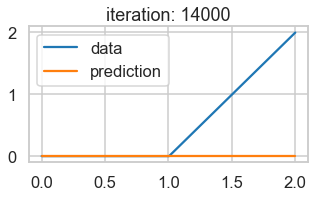

In [15]:
# save the animation
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.legend(loc='upper left')

def update_line(num):
    plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
    line.set_xdata(x)
    line.set_ydata(history.predictions[num])
    return []

ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                   interval=50, blit=True)
ani.save('neuron.mp4', fps=30, extra_args=['-vcodec', 'libx264', '-pix_fmt','yuv420p'])

uh-oh..

gulp (hard swallow)...

<br />
<center>
<img src="ipynb.images/oopsie.gif" width=400 />
</center>

Does our bunny mesh match our bunny cloud?

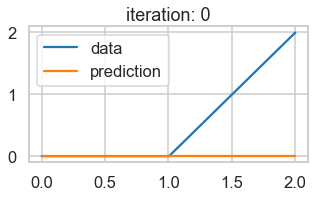

In [17]:
plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='data')
plt.plot(x, history.predictions[0], label='prediction')
plt.legend(loc='upper left')
plt.title('iteration: 0')
plt.savefig('ipynb.images/neuron_start.png')

Not really..

What's our **training error**?

Text(0.5, 1.0, 'training error')

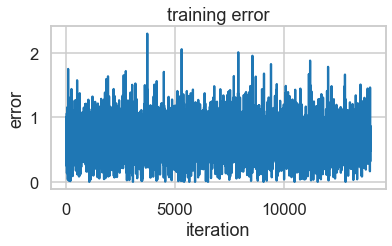

In [18]:
plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')

Hmm... Not good! We're ***not*** learning! 

Do you remember how I mentioned [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) during our discussion on activation functions? This is exactly *what's happening here*!


<br />
<center>
<img src="ipynb.images/bad-robot.jpg" width=400 />
</center>

In [19]:
print('neural net weigths after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))

neural net weigths after training w0: -0.00, w1: 0.00


*No* change in weights!

### Back to the drawing board: Modify model hyperparameters

Let's use batch normalization, also called [mini-batch](https://en.wikipedia.org/wiki/Batch_normalization), a technique for improving speed, performance, and stability of artificial neural networks, introduced in 2015 paper.It normalizes the input layer by adjusting and scaling activations., thereyby smoothing the objective function to improve performance.

In Keras, it's the `batch-size` parameter:

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1, kernel_initializer="normal")`
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Text(0.5, 1.0, 'training error')

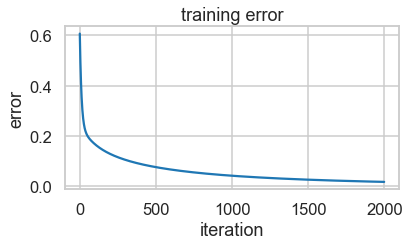

In [20]:
# Part 6: larger batch size
history = TrainingHistory()
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train,
          Y_train,
          batch_size=200,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')

哇！ Now look at that training error going to zero!

<br />
<center>
<img src="ipynb.images/good-robot.jpg" width=200 />
</center>

And if we plot results:

In [21]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


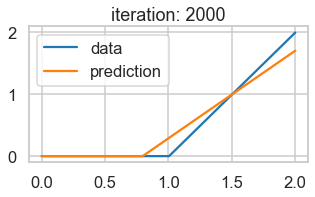

In [22]:
fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.legend(loc='upper left')

ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                   interval=50, blit=True)
ani.save('neuron-large_batch.mp4', fps=30, extra_args=['-vcodec', 'libx264', '-pix_fmt','yuv420p'])

### What is we start with zero weights?

Let's give training another shot, initializing our weights to zero:

In [23]:
# Part 7: Dying ReLu problem

np.random.seed(2)
history = TrainingHistory()
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net initialized with weigths w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))

neural net initialized with weigths w0: 0.03, w1: 0.00


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1, kernel_initializer="normal")`
  


What if we do this:

In [24]:
weights[0][0][0] = 0.

Let's train again:

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


neural net weigths after training w0: 1.41, w1: -1.12
dying ReLU problem!
http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks


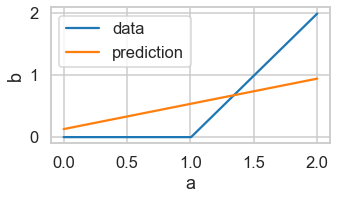

In [25]:
model.fit(X_train,
          Y_train,
          batch_size=200,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
print('neural net weigths after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals()))
print('dying ReLU problem!')
print('http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks')

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.xlabel('a')
plt.ylabel('b')
plt.legend(loc='upper left')

Oh-oh! And we did use mini-batch! This is called the [dying ReLu](https://arxiv.org/abs/1903.06733) problem. Read the [URL](http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks) below!

In [26]:
print('dying ReLU problem!')
print('http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks')

dying ReLU problem!
http://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks


Text(0.5, 1.0, 'training error')

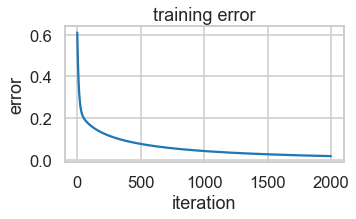

In [27]:
plt.figure(figsize=(5, 2.5))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')

Pretty strange indeed! Looks like we won at step 0. But not really..

This problem is usually fixed using a ***leaky ReLU***, which we mentioned during our discussion on activation functions. Let's move on to more neurons now.

# Sixty neurons

<br />
<center>
<img src="ipynb.images/brain.gif" width=200 />
</center>

Let's try increasing our level of intelligence by augmenting our brain from ***one*** to ***sixty*** neurons (still only ***one*** layer).

<br />
<center>
<img src="ipynb.images/neurons-60.png" width=600 />
</center>

Let's work with slightly more complicated data: Let's model a *noisy* **double-sine** function.

Text(0.5, 1.0, 'A noisy sine')

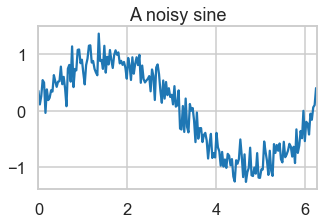

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('whitegrid')
sns.set_context('talk')

np.random.seed(0)
x = np.linspace(0, 2 * math.pi, 200)
sine = np.sin(x)
err = np.random.normal(0, 0.2, len(sine))
y = sine + err
plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.xlim([0, 2 * math.pi])
plt.title('A noisy sine')

Let's **compile** a Keras model with a single layer of 60 neurons. This should remind you of our caterpilar brain, slightly larger, with non-linear activation.

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

n_conn = 60
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='sgd')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=60)`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


Let's save the training history.

In [30]:
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T

Let's **train** our model in 5000 timesteps:

In [31]:
history = TrainingHistory()
res = model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Let's animate our learning process:

In [34]:
import matplotlib.animation as animation

def visualize_training(history, name):
    fig = plt.figure(figsize=(5, 2.5))
    plt.plot(x, y, label='data')
    line, = plt.plot(x, history.predictions[0],  label='prediction')
    plt.legend()

    def update_line(num):
        plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
        line.set_xdata(x)
        line.set_ydata(history.predictions[num])
        return []

    ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                       interval=50, blit=True)
    ani.save('{0}.mp4'.format(name), dpi=100, extra_args=['-vcodec', 'libx264', '-pix_fmt','yuv420p'])

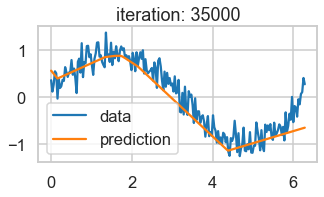

In [35]:
visualize_training(history, 'noisy-sine-one-layer')

Oh... We were able to model the first "*kink*" in our 1D mesh cloud, but ***not the second***!

>**DISCUSSION**: Why do you think?

This is what we started with at step 0:

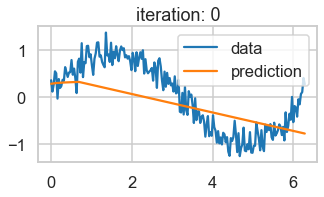

In [43]:
    plt.figure(figsize=(5, 2.5))
    plt.plot(x, y, label='data')
    plt.plot(x, history.predictions[0], label='prediction')
    plt.legend()
    plt.title('iteration: 0')
    plt.savefig('ipynb.images/{0}.png'.format('noisy-sine-one-layer'))

This is our training error:

Text(0.5, 1.0, 'training error')

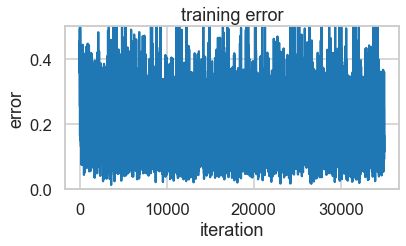

In [44]:
    plt.figure(figsize=(6, 3))
    plt.plot(history.losses)
    plt.ylabel('error')
    plt.xlabel('iteration')
    plt.ylim([0, 0.5])
    plt.title('training error')

### A Better model?

>**Challenge**: Can you come up with a better neural architecture that retains the same "*brainpower*", i.e. number of neurons (60 neurons) and weights, but *increases* modeling intelligence, Dr. Frankenstein?

<br />
<center>
<img src="ipynb.images/give-you-life.gif" width=400 />
</center>

<details>
      <summary>Can you come up with this "*clever-er*" architecture?</summary>
<br />
<center>
<img src="ipynb.images/neurons-10-10.png" width=200 />
    Count the number of weights and compare to the 60 neuron single layer!
</center>
</details>

Let's compile:

In [45]:
n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='sgd')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys


Let's train:

In [41]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Let's visualize our learning:

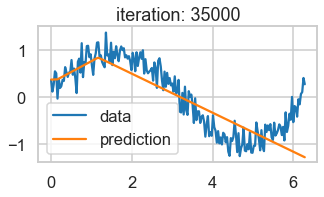

In [46]:
visualize_training(history, 'tiny-sine-two-layer')

>哇！他真棒！

Is adding a second layer the only possible way to increase our learning power? No, we can also watch an episode of GoT... Kidding! We can also use  optimizers such as [Adam](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c). Let's ***go back*** to our single layer of 60 neurons and leverage Adam!

In [50]:
from keras.optimizers import Adam

n_conn = 60
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=60)`
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys


In [47]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


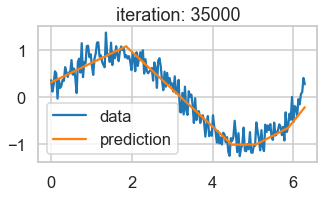

In [48]:
visualize_training(history, 'tiny-sine-one-layer-adam')

Wow! It ***worked***， with a *single* layer!

And what if we combine our two-layer model ***and*** use Adam?

In [51]:
# Part 8
n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=10)`
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [52]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


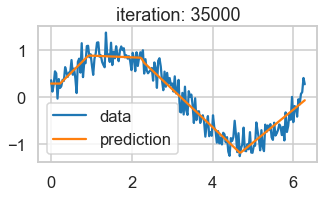

In [53]:
visualize_training(history, 'tiny-sine-two-layer-adam')

>**NOTE** Professor, so many hyperparameters to play with! Yup, just like with Bayesian modeling, modeling is an ***art*** *and* a science1

# Tensorflow

Now that we know our Keras API and how to build ANNs, let's apply this knowledge to Tensorflow, which uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras).

Let's use it ti predict house prices in Boston.

In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. In a *classification* problem (discriminative model), we aim to predict a discrete label. 

Let's predict the median price of homes in a Boston suburb in the mid-1970s. We'll provide the model with some data points about the suburb, such as the crime rate and the local property tax rate.

In [54]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.1.0


## The Boston Housing Prices dataset

The [dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) is accessible directly in TensorFlow. 

Let's download and **shuffle** the training set:

In [55]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

57344/57026 [==============================] - 0s 1us/step


### Examples and features

This dataset is small: it has 506 total examples, split between 404 training examples and 102 test examples:

In [56]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


The dataset contains 13 different features:

1.   Per capita crime rate.
2.   The proportion of residential land zoned for lots over 25,000 square feet.
3.   The proportion of non-retail business acres per town.
4.   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5.   Nitric oxides concentration (parts per 10 million).
6.   The average number of rooms per dwelling.
7.   The proportion of owner-occupied units built before 1940.
8.   Weighted distances to five Boston employment centers.
9.   Index of accessibility to radial highways.
10.  Full-value property-tax rate per $10,000.
11.  Pupil-teacher ratio by town.
12.  1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13.  Percentage lower status of the population.

Each one of these input data features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

> **DISCUSSION**: As a modeler and developer, think about how this data is used and the potential benefits and harm a model's predictions can cause. A model like this could reinforce societal biases and disparities. Is a feature relevant to the problem you want to solve or will it introduce bias? For more information, read about [ML fairness](https://developers.google.com/machine-learning/fairness-overview/).

Let's display sample features and notice the different scales:

In [57]:
print(train_data[0]) 

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


Let's use [pandas](https://pandas.pydata.org) to display the first few rows of the dataset in a nicely formatted table:

In [58]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


### Labels

The labels are the house prices in thousands of dollars. (You may notice mid-1970s prices.)

In [59]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


## Normalize features

It's ***always*** recommended to normalize features that use different scales and ranges. 

For each feature, subtract the mean of the feature and divide by the standard deviation (or use `sklearn`'s `preprocessing.MinMaxScaler` API):

In [65]:
# Test data is *not* used when calculating the mean and std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


Although the model *might* converge without feature normalization, it makes training more ***difficult***, and it makes the resulting model more dependent on the choice of units used in the input.

## Create the model

Let's build our model. Here, we'll use a Keras `Sequential` model with two densely connected hidden layers (since these worked so well for us in the noisy sine), and an output layer that returns a **single**, **continuous** value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

`model.summary()`gives us a nice visual:

In [66]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'RMSPropOptimizer'

## Train the model

Let's train for 500 epochs and record the training and validation accuracy in the `history2` object.

In [62]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history2 = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])

ValueError: Error when checking input: expected dense_17_input to have shape (1,) but got array with shape (13,)

Let's visualize the model's training progress using the stats stored in the `history` object. We want to use this data to determine how long to train *before* the model stops making progress.

In [63]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history2)

NameError: name 'history2' is not defined

This graph shows little improvement in the model after about 200 epochs. Let's update the `model.fit` method to automatically **stop training** when the validation score doesn't improve. We'll use a *callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history2 = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history2)

The graph shows the average error is about \\$2,500 dollars. 

Let's see how did the model performs on the test set:

In [ ]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

## Predict

Finally, let's predict some housing prices using data in the testing set:

In [ ]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

What does this histogram look like?

## Some advice, not nearly enough

* Mean Squared Error (MSE) is a common loss function used for regression problems (different than classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When input data features have values with different ranges, each feature should be scaled independently.
* If there is not much training data, prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.